In [1]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
fit_loader = arff.loadarff('fit_class.arff')
test_loader = arff.loadarff('test_class.arff')
fit = pd.DataFrame(fit_loader[0])
test = pd.DataFrame(test_loader[0])

In [3]:
lookup = {
    b'nfp': 0,
    b'fp': 1
}
fit['y'] = fit['CLASS'].apply(lambda x: lookup[x])
test['y'] = test['CLASS'].apply(lambda x: lookup[x])

In [4]:
fit.head()

,NUMUORS,NUMUANDS,TOTOTORS,TOTOPANDS,VG,NLOGIC,LOC,ELOC,CLASS,y
0,22.0,85.0,203.0,174.0,9.0,0.0,362.0,40.0,b'nfp',0
1,21.0,87.0,186.0,165.0,5.0,0.0,379.0,32.0,b'nfp',0
2,30.0,107.0,405.0,306.0,25.0,0.0,756.0,99.0,b'nfp',0
3,6.0,5.0,19.0,6.0,2.0,0.0,160.0,9.0,b'nfp',0
4,21.0,47.0,168.0,148.0,7.0,0.0,352.0,29.0,b'nfp',0


In [5]:
test.head()

,NUMUORS,NUMUANDS,TOTOTORS,TOTOPANDS,VG,NLOGIC,LOC,ELOC,CLASS,y
0,6.0,12.0,127.0,45.0,10.0,0.0,641.0,55.0,b'nfp',0
1,5.0,5.0,41.0,12.0,1.0,0.0,407.0,17.0,b'nfp',0
2,23.0,28.0,95.0,66.0,4.0,2.0,241.0,20.0,b'nfp',0
3,5.0,5.0,35.0,20.0,1.0,0.0,254.0,14.0,b'nfp',0
4,6.0,10.0,43.0,26.0,1.0,0.0,264.0,17.0,b'nfp',0


In [6]:
# (EXP(-6.773+0.1126*A2 + 0.0244*B2 + 0.0018*C2 + -0.0109*D2 + -0.1022*E2 + 0.1269*F2 + 0.0013*G2 +0.0591*H2))/(1+EXP(-6.773+0.1126*A2 + 0.0244*B2 + 0.0018*C2 + -0.0109*D2 + -0.1022*E2 + 0.1269*F2 + 0.0013*G2 +0.0591*H2))
def log_reg(x):
    lin_comb = -6.773 + 0.0591 * x.ELOC + 0.0013 * x.LOC + 0.1269 * x.NLOGIC + -0.1022 * x.VG + -0.0109 * x.TOTOPANDS + 0.0018 * x.TOTOTORS + 0.0244 * x.NUMUANDS + 0.1126 * x.NUMUORS
    e_x = np.exp(lin_comb)
    return e_x/(1+e_x)

In [7]:
fit['p'] = log_reg(fit)
test['p'] = log_reg(test)

In [8]:
fit.head()

,NUMUORS,NUMUANDS,TOTOTORS,TOTOPANDS,VG,NLOGIC,LOC,ELOC,CLASS,y,p
0,22.0,85.0,203.0,174.0,9.0,0.0,362.0,40.0,b'nfp',0,0.137264
1,21.0,87.0,186.0,165.0,5.0,0.0,379.0,32.0,b'nfp',0,0.132803
2,30.0,107.0,405.0,306.0,25.0,0.0,756.0,99.0,b'nfp',0,0.708498
3,6.0,5.0,19.0,6.0,2.0,0.0,160.0,9.0,b'nfp',0,0.004189
4,21.0,47.0,168.0,148.0,7.0,0.0,352.0,29.0,b'nfp',0,0.042440


In [9]:
test.head()

,NUMUORS,NUMUANDS,TOTOTORS,TOTOPANDS,VG,NLOGIC,LOC,ELOC,CLASS,y,p
0,6.0,12.0,127.0,45.0,10.0,0.0,641.0,55.0,b'nfp',0,0.047214
1,5.0,5.0,41.0,12.0,1.0,0.0,407.0,17.0,b'nfp',0,0.008894
2,23.0,28.0,95.0,66.0,4.0,2.0,241.0,20.0,b'nfp',0,0.062497
3,5.0,5.0,35.0,20.0,1.0,0.0,254.0,14.0,b'nfp',0,0.005554
4,6.0,10.0,43.0,26.0,1.0,0.0,264.0,17.0,b'nfp',0,0.008052


In [10]:
def gcr(p, c):
    ratio = (1 - p) / p
    bools = ratio.ge(c)
    binary = bools.eq(False).mul(1)
    return binary

In [13]:
values = [0.1, 0.5, 1, 2, 3, 4, 5, 6, 10, 15, 20, 30, 40, 50]
outputs = []
outputs_test = []
for c in values:
    predictions = gcr(fit['p'], c)
    predictions_test = gcr(test['p'], c)
    outputs.append(predictions)
    outputs_test.append(predictions_test)

In [14]:
print(len(outputs))
print(outputs[0].shape)

print(len(outputs_test))
print(outputs_test[0].shape)

14
(188,)
14
(94,)


In [18]:
fit_results = []
for i, c in enumerate(values):
    tn, fp, fn, tp = confusion_matrix(fit['y'], outputs[i]).ravel()
    out = {
        'c': c,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp,
        'fpr': fp / (fp + tn),
        'fnr': fn / (fn + tp),
        'tnr': tn / (tn + fp),
        'tpr': tp / (tp + fn),
        'accuracy': (tn + tp) / (tn + fp + fn + tp),
        'error_rate': (fn + fp) / (tn + fp + fn + tp)
    }
    fit_results.append(out)

fit_cm = pd.DataFrame(fit_results)
fit_cm

test_results = []
for i, c in enumerate(values):
    tn, fp, fn, tp = confusion_matrix(test['y'], outputs_test[i]).ravel()
    out = {
        'c': c,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp,
        'fpr': fp / (fp + tn),
        'fnr': fn / (fn + tp),
        'tnr': tn / (tn + fp),
        'tpr': tp / (tp + fn),
        'accuracy': (tn + tp) / (tn + fp + fn + tp),
        'error_rate': (fn + fp) / (tn + fp + fn + tp)
    }
    test_results.append(out)

test_cm = pd.DataFrame(test_results)
fit_cm

,accuracy,c,error_rate,fn,fnr,fp,fpr,tn,tnr,tp,tpr
0,0.845745,0.1,0.154255,28,0.509091,1,0.007519,132,0.992481,27,0.490909
1,0.856383,0.5,0.143617,20,0.363636,7,0.052632,126,0.947368,35,0.636364
2,0.882979,1.0,0.117021,14,0.254545,8,0.060150,125,0.939850,41,0.745455
3,0.904255,2.0,0.095745,8,0.145455,10,0.075188,123,0.924812,47,0.854545
4,0.898936,3.0,0.101064,6,0.109091,13,0.097744,120,0.902256,49,0.890909
5,0.904255,4.0,0.095745,2,0.036364,16,0.120301,117,0.879699,53,0.963636
6,0.882979,5.0,0.117021,2,0.036364,20,0.150376,113,0.849624,53,0.963636
7,0.861702,6.0,0.138298,2,0.036364,24,0.180451,109,0.819549,53,0.963636
8,0.781915,10.0,0.218085,1,0.018182,40,0.300752,93,0.699248,54,0.981818
9,0.702128,15.0,0.297872,1,0.018182,55,0.413534,78,0.586466,54,0.981818


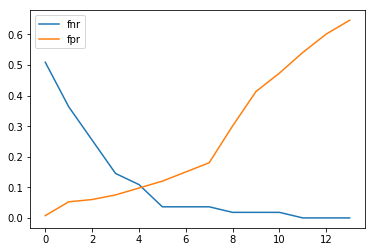

In [16]:
fit_cm.plot(y=['fnr', 'fpr'])

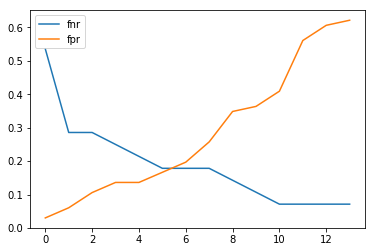

In [17]:
test_cm.plot(y=['fnr', 'fpr'])

In [19]:
test_cm

,accuracy,c,error_rate,fn,fnr,fp,fpr,tn,tnr,tp,tpr
0,0.819149,0.1,0.180851,15,0.535714,2,0.030303,64,0.969697,13,0.464286
1,0.872340,0.5,0.127660,8,0.285714,4,0.060606,62,0.939394,20,0.714286
2,0.840426,1.0,0.159574,8,0.285714,7,0.106061,59,0.893939,20,0.714286
3,0.829787,2.0,0.170213,7,0.250000,9,0.136364,57,0.863636,21,0.750000
4,0.840426,3.0,0.159574,6,0.214286,9,0.136364,57,0.863636,22,0.785714
5,0.829787,4.0,0.170213,5,0.178571,11,0.166667,55,0.833333,23,0.821429
6,0.808511,5.0,0.191489,5,0.178571,13,0.196970,53,0.803030,23,0.821429
7,0.765957,6.0,0.234043,5,0.178571,17,0.257576,49,0.742424,23,0.821429
8,0.712766,10.0,0.287234,4,0.142857,23,0.348485,43,0.651515,24,0.857143
9,0.712766,15.0,0.287234,3,0.107143,24,0.363636,42,0.636364,25,0.892857
